In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Plotting function

In [2]:
def plot(data_x, title, filename, legend, ylabel='Cumulative data_x', xlabel='Epochs', color=None):
    cmap = ['red', 'blue', 'black', 'green', 'gray']

    # Plot L of class 0
    fig, ax = plt.subplots(1, 1, figsize=(10, 7.5))
    
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    # Provide tick lines across the plot to help your viewers trace along the axis ticks. 
    plt.grid(True, which='major', axis='y', ls='--', lw=0.5, c='k', alpha=0.3)
    
#    plt.tick_params(axis='both', which='both', bottom=True, top=True,
#                   labelbottom=True, left=True, right=True, labelleft=True)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    runs = legend

    plt.title(title, fontsize=16)
    for i in range(len(data_x)):
        clr = cmap[i] if color is None else color
        plt.plot(range(1,len(data_x[0])+1), data_x[i], lw=2.5, color = clr, label=runs[i])

    plt.legend(ncol=2)
    
    fig.savefig(filename+'.png', figsize=(12,8))
    plt.show()
    fig.clear()


# Load results

In [3]:
# ccy_list = ['gbpusd', 'eurusd', 'jpyusd']
ccy_list = ['gbpusd']
epochs = np.arange(1,21)
gamma = [0.9, 0.7, 0.5]
lr_rate = [0.001, 0.01]
results_path = {}
expr = {}
info_names = ['epi_rewards', 'epi_losses', 'epi_pf_values', 'epi_actions', 'epi_val_losses']

# expr[ccy][mode][epoch][gamma][lr_rate]
# epoch = {1, 2, ..., 20}
def load_results():
    for ccy in ccy_list:
        results_path[ccy] = {}
        expr[ccy] = {}
        for mode in ['train', 'test']:
            results_path[ccy][mode] = {}
            expr[ccy][mode] = {}
            for epoch in range(1,21):
                results_path[ccy][mode][epoch] = {}
                expr[ccy][mode][epoch] = {}
                for g in gamma:
                    results_path[ccy][mode][epoch][g] = {}
                    expr[ccy][mode][epoch][g] = {}
                    for lr in lr_rate:
                        results_path[ccy][mode][epoch][g][lr] = './results/final/' + ccy + \
                                '/' + str(epoch).zfill(2) + mode + '_' + ccy + '_q_net_g' + str(g) + 'lr' + \
                                str(lr) + 'dr0.03.tf' + '/'
                        expr[ccy][mode][epoch][g][lr] = {}
                        for info_name in info_names:
                            expr[ccy][mode][epoch][g][lr][info_name] = np.load(results_path[ccy][mode][epoch][g][lr] + info_name + '.npy')



In [4]:
load_results()

In [5]:
def get_data(expr, ccy, mode, gamma, info_name, lr_rate=0.001):
    '''
    Returns a dictionary where its key is a epoch number and its values are defined as 'info_name'
    '''
    return {e:expr[ccy][mode][e][gamma][lr_rate][info_name] for e in epochs}

# Plotting examples
## Training data
- Currency: gbpusd
- Gamma: 0.9, 0.7 and 0.5
- Learning rate: 0.001
- Epoch: every epoch from 1 to 20

In [6]:
ccy = 'gbpusd'
mode = 'train'
epoch = 20 # default
gamma = [0.9, 0.7, 0.5]
lr = 0.001 # default
# A key is one of 'epi_rewards', 'epi_losses', 'epi_pf_values', 'epi_actions', 'epi_val_losses'

In [7]:
rewards = {}
losses = {}
pf_values = {}
for g in gamma:
    rewards[g] = get_data(expr, ccy = ccy, mode = mode, gamma = g, info_name='epi_rewards')
    losses[g] = get_data(expr, ccy = ccy, mode = mode, gamma = g, info_name='epi_losses')
    pf_values[g] = get_data(expr, ccy = ccy, mode = mode, gamma = g, info_name='epi_pf_values')

### Rewards
- will be converted to returns in plots

Example: gamma 0.5, 20th epoch

In [8]:
rewards[0.5][20]

array([-12.97629, -11.13144,  -6.5088 ,   0.     ,  10.8101 ,  -8.7202 ,
         4.06901,   0.     ,   0.     ,   0.     ,   0.     ,   1.88243,
         0.     ,  -0.93216,   0.     ,  -2.46988,  17.0796 ,   6.73712,
         1.86418,   0.     ])

#### Keys of `rewards` are epoch numbers

In [9]:
rewards[0.9].keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

#### Get average rewards per epoch and store it into a dictionary `avg_rewards_per_epoch`
- We transform rewards to percentage returns by dividing them by 100 because our initial wealth is 10,000 dollars and rewards are in dollar term.
- E.g. 100 rewards is 1% return.

In [10]:
avg_rewards_dict = {}
for g in gamma:
    avg_rewards_dict[g] = [np.average(rewards[g][epoch]) for epoch in rewards[g].keys()]
    avg_rewards_dict[g] = np.array(avg_rewards_dict[g]) / 100

Make a list of data to draw on the **same** plot.

In [11]:
avg_rewards = []

for g in gamma:
    avg_rewards.append(avg_rewards_dict[g])

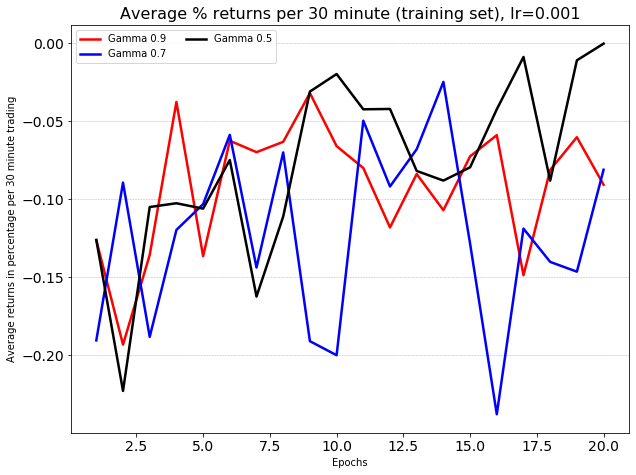

In [12]:
plot(data_x=avg_rewards,
         title='Average % returns per 30 minute (training set), lr=0.001',
         filename='avg_rewards_lr0.001_training',
         legend=['Gamma ' + str(g) for g in gamma],
         ylabel='Average returns in percentage per 30 minute trading',
         xlabel='Epochs')

In [13]:
dqn_rewards_train_5 = avg_rewards_dict[0.5]
dqn_rewards_train_7 = avg_rewards_dict[0.7]
dqn_rewards_train_9 = avg_rewards_dict[0.9]

### Losses

Example: gamma 0.9, 20th epoch

In [14]:
losses[0.9][20]

array([108.33393093,  78.19492922, 100.65823048,  92.38297589,
        93.36932867, 109.71560841, 103.79828211, 108.25063931,
        93.90586727,  92.80924398,  87.03238597, 104.76495051,
       104.19219951, 120.2890959 ,  80.71902432, 105.37454526,
        92.92561671,  86.38620826,  96.68916603,  85.57125535])

In [15]:
avg_losses_dict = {}
for g in gamma:
    avg_losses_dict[g] = [np.average(losses[g][epoch]) for epoch in losses[g].keys()]
    avg_losses_dict[g] = np.array(avg_losses_dict[g])

Make a list of data to draw on the **same** plot.

In [16]:
avg_losses = []

for g in gamma:
    avg_losses.append(avg_losses_dict[g])

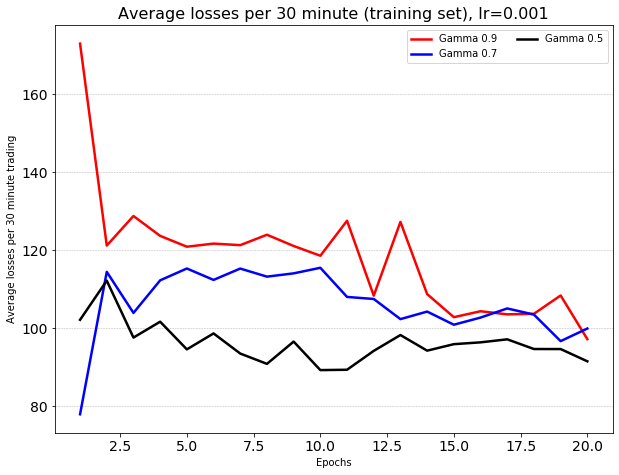

In [17]:
plot(data_x=avg_losses,
         title='Average losses per 30 minute (training set), lr=0.001',
         filename='avg_losses_lr0.001_training',
         legend=['Gamma ' + str(g) for g in gamma],
         ylabel='Average losses per 30 minute trading',
         xlabel='Epochs')

### Different learning rates of 0.001 and 0.01 with gamma=0.5

### Rewards

In [18]:
rewards = {}
losses = {}
pf_values = {}
g = 0.5
for lr in lr_rate:
    rewards[lr] = get_data(expr, ccy = ccy, mode = mode, gamma = g, lr_rate=lr, info_name='epi_rewards')
    losses[lr] = get_data(expr, ccy = ccy, mode = mode, gamma = g, lr_rate=lr, info_name='epi_losses')
    pf_values[lr] = get_data(expr, ccy = ccy, mode = mode, gamma = g, lr_rate=lr, info_name='epi_pf_values')

In [19]:
avg_rewards_dict = {}
for lr in lr_rate:
    avg_rewards_dict[lr] = [np.average(rewards[lr][epoch]) for epoch in rewards[lr].keys()]
    avg_rewards_dict[lr] = np.array(avg_rewards_dict[lr]) / 100

Make a list of data to draw on the **same** plot.

In [20]:
avg_rewards = []

for lr in lr_rate:
    avg_rewards.append(avg_rewards_dict[lr])

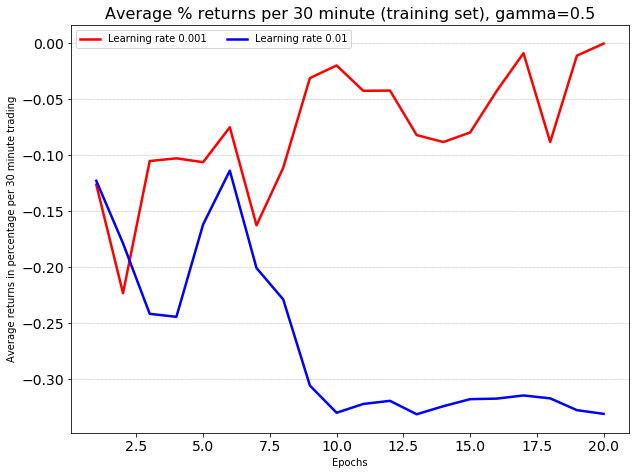

In [21]:
plot(data_x=avg_rewards,
         title='Average % returns per 30 minute (training set), gamma=0.5',
         filename='avg_rewards_gamma0.5_training',
         legend=['Learning rate ' + str(lr) for lr in lr_rate],
         ylabel='Average returns in percentage per 30 minute trading',
         xlabel='Epochs')

In [22]:
avg_losses_dict = {}
for lr in lr_rate:
    avg_losses_dict[lr] = [np.average(losses[lr][epoch]) for epoch in losses[lr].keys()]
    avg_losses_dict[lr] = np.array(avg_losses_dict[lr])

Make a list of data to draw on the **same** plot.

In [23]:
avg_losses = []

for lr in lr_rate:
    avg_losses.append(avg_losses_dict[lr])

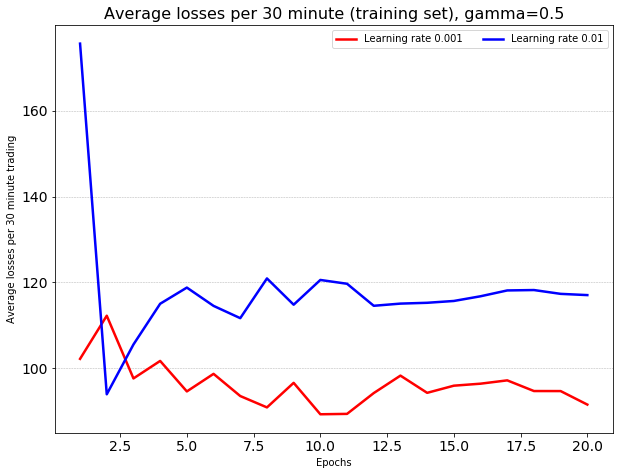

In [24]:
plot(data_x=avg_losses,
         title='Average losses per 30 minute (training set), gamma=0.5',
         filename='avg_losses_gamma0.5_training',
         legend=['Learning rate ' + str(lr) for lr in lr_rate],
         ylabel='Average losses per 30 minute trading',
         xlabel='Epochs')

# Test set

In [25]:
mode = 'test'

In [26]:
rewards = {}
losses = {}
pf_values = {}
for g in gamma:
    rewards[g] = get_data(expr, ccy = ccy, mode = mode, gamma = g, info_name='epi_rewards')
    losses[g] = get_data(expr, ccy = ccy, mode = mode, gamma = g, info_name='epi_losses')
    pf_values[g] = get_data(expr, ccy = ccy, mode = mode, gamma = g, info_name='epi_pf_values')

In [27]:
avg_rewards_dict = {}
for g in gamma:
    avg_rewards_dict[g] = [np.average(rewards[g][epoch]) for epoch in rewards[g].keys()]
    avg_rewards_dict[g] = np.array(avg_rewards_dict[g]) / 100

Make a list of data to draw on the **same** plot.

In [28]:
avg_rewards = []

for g in gamma:
    avg_rewards.append(avg_rewards_dict[g])

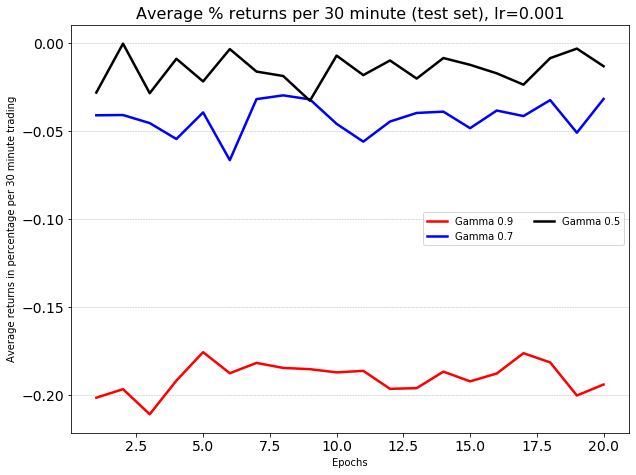

In [29]:
plot(data_x=avg_rewards,
         title='Average % returns per 30 minute (test set), lr=0.001',
         filename='avg_rewards_lr0.001_test',
         legend=['Gamma ' + str(g) for g in gamma],
         ylabel='Average returns in percentage per 30 minute trading',
         xlabel='Epochs')

In [30]:
dqn_rewards_test_5 = avg_rewards_dict[0.5]
dqn_rewards_test_7 = avg_rewards_dict[0.7]
dqn_rewards_test_9 = avg_rewards_dict[0.9]

### Different learning rates of 0.001 and 0.01 with gamma=0.5

### Rewards

In [31]:
rewards = {}
losses = {}
pf_values = {}
g = 0.5
for lr in lr_rate:
    rewards[lr] = get_data(expr, ccy = ccy, mode = mode, gamma = g, lr_rate=lr, info_name='epi_rewards')
    losses[lr] = get_data(expr, ccy = ccy, mode = mode, gamma = g, lr_rate=lr, info_name='epi_losses')
    pf_values[lr] = get_data(expr, ccy = ccy, mode = mode, gamma = g, lr_rate=lr, info_name='epi_pf_values')

In [32]:
avg_rewards_dict = {}
for lr in lr_rate:
    avg_rewards_dict[lr] = [np.average(rewards[lr][epoch]) for epoch in rewards[lr].keys()]
    avg_rewards_dict[lr] = np.array(avg_rewards_dict[lr]) / 100

Make a list of data to draw on the **same** plot.

In [33]:
avg_rewards = []

for lr in lr_rate:
    avg_rewards.append(avg_rewards_dict[lr])

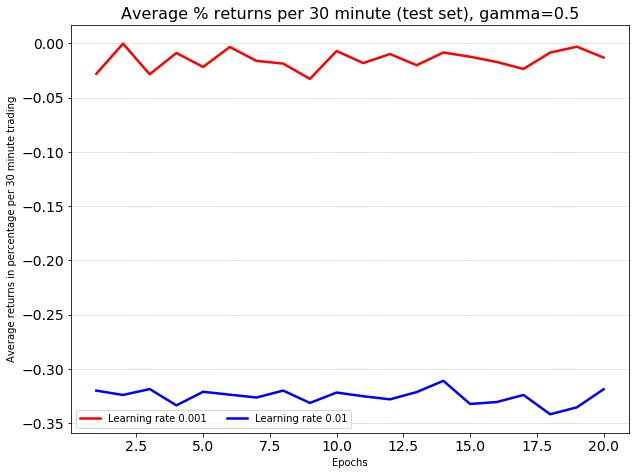

In [34]:
plot(data_x=avg_rewards,
         title='Average % returns per 30 minute (test set), gamma=0.5',
         filename='avg_rewards_gamma0.5_test',
         legend=['Learning rate ' + str(lr) for lr in lr_rate],
         ylabel='Average returns in percentage per 30 minute trading',
         xlabel='Epochs')

## Mean reversion

In [35]:
mr_train = './results/final/mean_reversion/mr_train.npy'
mr_test = './results/final/mean_reversion/mr_test.npy'
mr_rewards_train = np.load(mr_train)
mr_rewards_test = np.load(mr_test)
mr_rewards_train = mr_rewards_train/100
mr_rewards_test = mr_rewards_test/100

In [36]:
dqn_mr_rewards_train = []

dqn_mr_rewards_train.append(dqn_rewards_train_5)
dqn_mr_rewards_train.append(dqn_rewards_train_7)
# dqn_mr_rewards_train.append(dqn_rewards_train_9)
dqn_mr_rewards_train.append(mr_rewards_train)

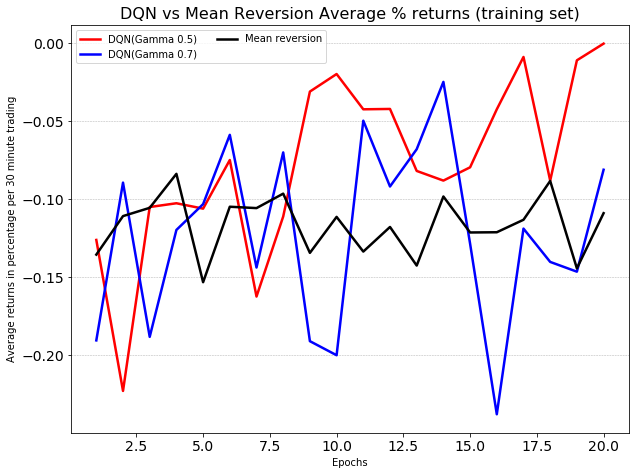

In [37]:
plot(data_x=dqn_mr_rewards_train,
         title='DQN vs Mean Reversion Average % returns (training set)',
         filename='dqn_mr_returns_all_gammas_training',
         legend=['DQN(Gamma 0.5)', 'DQN(Gamma 0.7)', 'Mean reversion'],
         ylabel='Average returns in percentage per 30 minute trading',
         xlabel='Epochs')

In [38]:
dqn_mr_rewards_train = []

dqn_mr_rewards_train.append(dqn_rewards_train_5)
dqn_mr_rewards_train.append(mr_rewards_train)

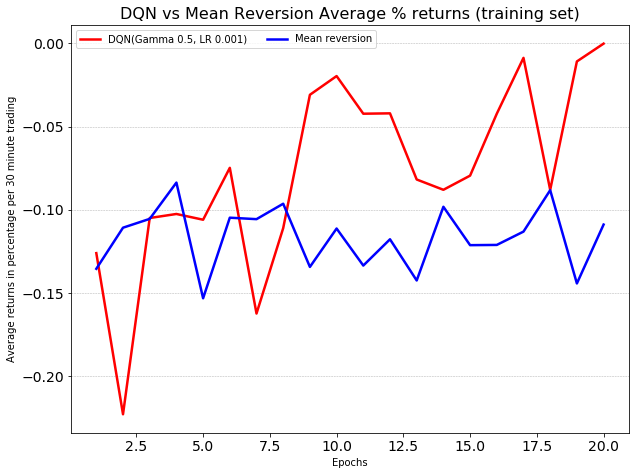

In [39]:
plot(data_x=dqn_mr_rewards_train,
         title='DQN vs Mean Reversion Average % returns (training set)',
         filename='dqn_mr_returns_gamma0.5_train',
         legend=['DQN(Gamma 0.5, LR 0.001)', 'Mean reversion'],
         ylabel='Average returns in percentage per 30 minute trading',
         xlabel='Epochs')

In [40]:
dqn_mr_rewards_test = []

dqn_mr_rewards_test.append(dqn_rewards_test_5)
dqn_mr_rewards_test.append(dqn_rewards_test_7)
# dqn_mr_rewards_test.append(dqn_rewards_test_9)
dqn_mr_rewards_test.append(mr_rewards_test)

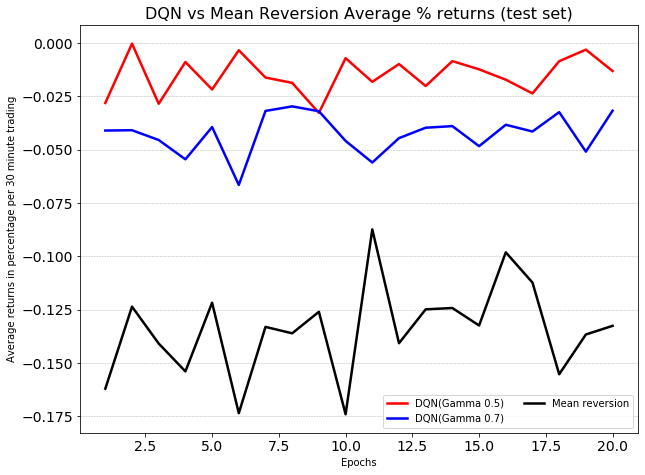

In [41]:
plot(data_x=dqn_mr_rewards_test,
         title='DQN vs Mean Reversion Average % returns (test set)',
         filename='dqn_mr_returns_all_gammas_test',
         legend=['DQN(Gamma 0.5)', 'DQN(Gamma 0.7)', 'Mean reversion'],
         ylabel='Average returns in percentage per 30 minute trading',
         xlabel='Epochs')

In [42]:
dqn_mr_rewards_test = []

dqn_mr_rewards_test.append(dqn_rewards_test_5)
dqn_mr_rewards_test.append(mr_rewards_test)

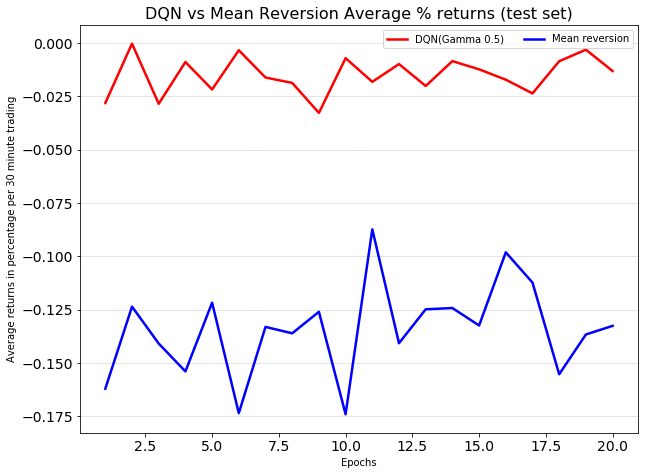

In [43]:
plot(data_x=dqn_mr_rewards_test,
         title='DQN vs Mean Reversion Average % returns (test set)',
         filename='dqn_mr_returns_gamma0.5_test',
         legend=['DQN(Gamma 0.5)', 'Mean reversion'],
         ylabel='Average returns in percentage per 30 minute trading',
         xlabel='Epochs')